In [1]:
pip install pandas openpyxl matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = r'C:/Users/user/Desktop/Projects/supply_chain/supply_chain_cleaned_dataset.xlsx'

In [14]:
xls = pd.ExcelFile('C:/Users/user/Desktop/Projects/supply_chain/supply_chain_cleaned_dataset.xlsx')
print(xls.sheet_names)

['Pivot_tables', 'pivot_charts', 'supply_chain_optimization_datas']


In [17]:
df = pd.read_excel('C:/Users/user/Desktop/Projects/supply_chain/supply_chain_cleaned_dataset.xlsx', sheet_name='supply_chain_optimization_datas')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            10000 non-null  object        
 1   Order_Date          10000 non-null  datetime64[ns]
 2   Warehouse_ID        10000 non-null  object        
 3   Product_ID          10000 non-null  object        
 4   Product_Category    10000 non-null  object        
 5   Units_Ordered       10000 non-null  int64         
 6   Unit_Cost           10000 non-null  float64       
 7   Total_sales         10000 non-null  float64       
 8   Transport_Mode      10000 non-null  object        
 9   Distance_km         10000 non-null  int64         
 10  Delivery_Time_days  10000 non-null  int64         
 11  Stock_Availability  10000 non-null  object        
 12  Delivery_Status     10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), obj

In [19]:
df.describe()

,Order_Date,Units_Ordered,Unit_Cost,Total_sales,Distance_km,Delivery_Time_days
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2023-07-02 17:18:31.680000,25.627400,253.585804,6520.778607,1017.669000,8.029600
min,2023-01-01 00:00:00,1.000000,5.140000,10.410000,50.000000,1.000000
25%,2023-04-01 00:00:00,13.000000,130.020000,1891.742500,520.000000,4.000000
50%,2023-07-04 00:00:00,26.000000,252.065000,4935.355000,1014.000000,8.000000
75%,2023-10-02 00:00:00,38.000000,378.717500,9830.025000,1512.250000,12.000000
max,2024-01-01 00:00:00,50.000000,499.970000,24883.500000,2000.000000,15.000000
std,NaN,14.467629,143.371065,5624.770486,566.760321,4.331028


In [23]:
print(df.head())

  Order_ID Order_Date Warehouse_ID Product_ID Product_Category  Units_Ordered  \
0   O10000 2023-10-13       WH-010     P52335        Groceries             26   
1   O10001 2023-04-14       WH-004     P93105       Automotive             18   
2   O10002 2023-09-18       WH-007     P78326       Automotive             20   
3   O10003 2023-04-10       WH-006     P72630       Automotive              3   
4   O10004 2023-07-18       WH-001     P82084      Electronics             30   

   Unit_Cost  Total_sales Transport_Mode  Distance_km  Delivery_Time_days  \
0     499.33     12982.58            Sea         1089                   2   
1      27.46       494.28           Road          609                  12   
2     303.45      6069.00            Air         1104                   8   
3     126.99       380.97           Rail         1628                  14   
4      61.17      1835.10            Sea         1094                   1   

  Stock_Availability Delivery_Status  
0          

In [21]:
print(df.shape)

(10000, 13)


In [22]:
print(df.columns)

Index(['Order_ID', 'Order_Date', 'Warehouse_ID', 'Product_ID',
       'Product_Category', 'Units_Ordered', 'Unit_Cost', 'Total_sales',
       'Transport_Mode', 'Distance_km', 'Delivery_Time_days',
       'Stock_Availability', 'Delivery_Status'],
      dtype='object')


In [24]:
print(df.isnull().sum())

Order_ID              0
Order_Date            0
Warehouse_ID          0
Product_ID            0
Product_Category      0
Units_Ordered         0
Unit_Cost             0
Total_sales           0
Transport_Mode        0
Distance_km           0
Delivery_Time_days    0
Stock_Availability    0
Delivery_Status       0
dtype: int64


In [26]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

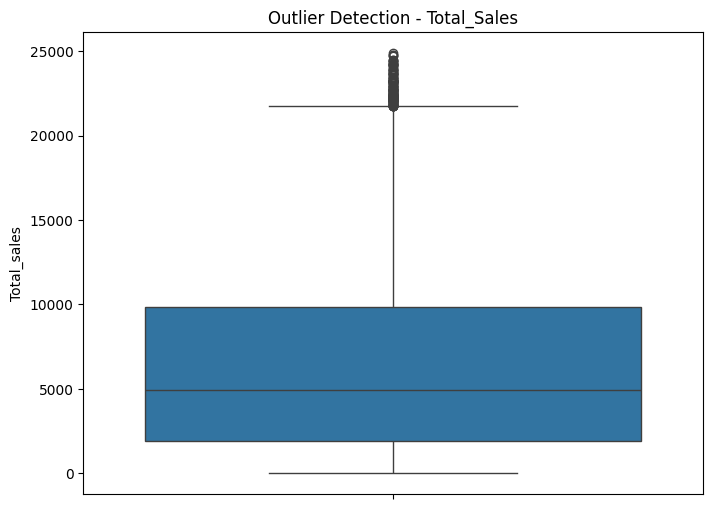

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Total_sales'])
plt.title('Outlier Detection - Total_Sales')
plt.show()


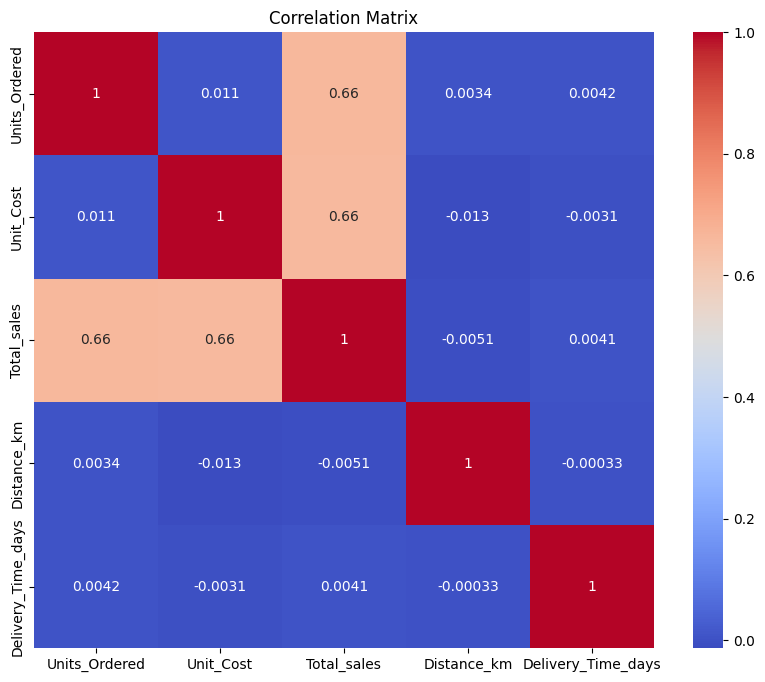

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


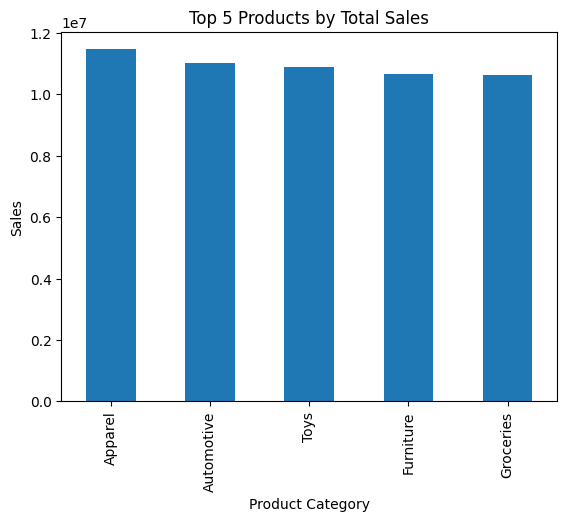

In [38]:
# Top 5 products by sales
top_products = df.groupby('Product_Category')['Total_sales'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', title='Top 5 Products by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

In [40]:
#Export the final cleaned data
df.to_csv( r'C:/Users/user/Desktop/Projects/supply_chain/final_cleaned_data.csv', index=False)

print("Data cleaning and EDA completed successfully!")

Data cleaning and EDA completed successfully!
